# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [46]:
# your answer here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [47]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [48]:
# Method 1
# your answer here
employee.groupby('Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [49]:
# Method 2
# your answer here

employee.pivot_table(index='Department', values='Salary', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [50]:
# your answer here
employee.pivot_table(index=['Department','Title'], values='Salary', aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [51]:
# your answer here
employee.pivot_table(index=['Title'], values=['Salary','Years'], aggfunc='mean')

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [85]:
# your answer here
employee_pivot = employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc=['mean','count'])
employee_pivot.columns = ['Mean Salary', 'Number of employees']
employee_pivot

Mean Salary  Number of employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [53]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std', 'count'])

# There are a bunch of NaNs in the standard deviation. From above we know the dataset is very small. Show the count
# With the count we can see that when the Count is 1, the Std is NaN.. the standard deviation for a sample of a population is undefined, so that's what the 'std' method is calculating because the standard deviation for a population of 1 would be 0
# For Sales associate the std is 0 because all (2) of them receive the same pay



median    min    max       std  count
                     Salary Salary Salary    Salary Salary
Department Title                                          
HR         VP          70.0     70     70       NaN      1
           analyst     32.5     30     35  3.535534      2
IT         VP          70.0     70     70       NaN      1
           analyst     32.5     30     35  3.535534      2
           associate   60.0     60     60       NaN      1
Sales      associate   55.0     55     55  0.000000      2

#### Based on your comments, fill the missing values with an appropriate value.

In [54]:
# your answer here
new = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std', 'count'])
new.fillna(0)

median    min    max       std  count
                     Salary Salary Salary    Salary Salary
Department Title                                          
HR         VP          70.0     70     70  0.000000      1
           analyst     32.5     30     35  3.535534      2
IT         VP          70.0     70     70  0.000000      1
           analyst     32.5     30     35  3.535534      2
           associate   60.0     60     60  0.000000      1
Sales      associate   55.0     55     55  0.000000      2

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [55]:
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [56]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Years','Salary'], aggfunc={'Years':'sum','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [57]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [58]:
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [59]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [60]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [61]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

<AxesSubplot:xlabel='Minutes Very Active', ylabel='Steps'>

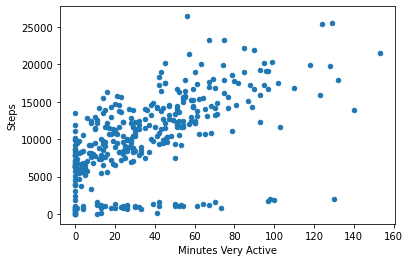

In [62]:
fitbit.plot.scatter(x='Minutes Very Active', y='Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [63]:
# There is some correlation between those 2 series

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [64]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

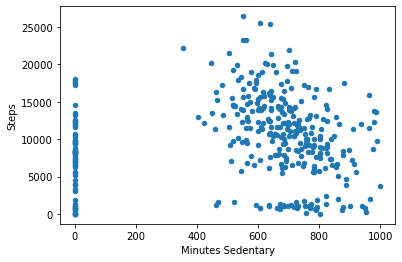

In [65]:
fitbit.plot.scatter(x='Minutes Sedentary', y='Steps')

# There is almost no correlation between the 2 series

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [66]:
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='MinutesOfSleep', ylabel='Steps'>

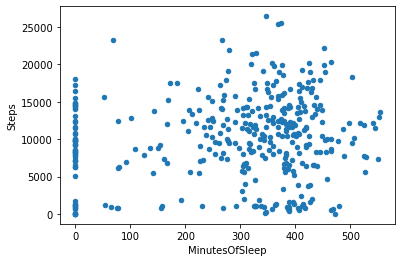

In [67]:
fitbit.plot.scatter(x='MinutesOfSleep', y='Steps')
# There is a small correlation between the 2 series

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [77]:
column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [81]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [86]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Grade'}>,
        <AxesSubplot:title={'center':'Study time'}>]], dtype=object)

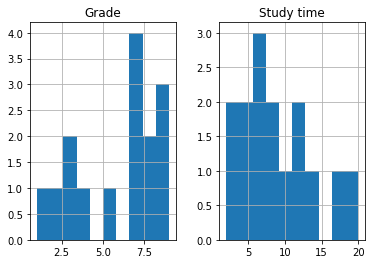

In [110]:
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [118]:
pearson_corr = time_grades['Grade'].corr(time_grades['Study time'], method='pearson')
spearman_corr = time_grades['Grade'].corr(time_grades['Study time'], method='spearman')

print(f"Pearson correlation: {pearson_corr}\nSpearman correlation: {spearman_corr}")
# Both methods results point towards both feature being highly correlated

Pearson correlation: 0.7980456073578859
Spearman correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='Grade', ylabel='Study time'>

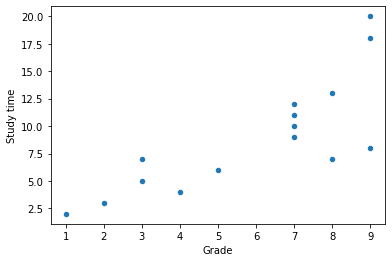

In [119]:
time_grades.plot.scatter(x='Grade', y='Study time')
# Both features are highly correlated

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [74]:
# https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8
'''
# "The Pearson correlation can evaluate ONLY a linear relationship between two continuous variables (A relationship is linear only when a change in one variable is associated with a proportional change in the other variable)"

# "The Spearman correlation can evaluate a monotonic relationship between two variables — Continous or Ordinal and it is based on the ranked values for each variable rather than the raw data."
# "A monotonic relationship is a relationship that: as the value of one variable increases, the value of the other variable increases (positive correlation) or decreases (negative corr)"
'''


# The PERSON correlation measures the LINEAR relationship between variables while the SPEARMAN measures how much the increase in one variable also creates an increase (or decrease if negatively correlated) in the other but doesn't care that much about how big of an increase/decrease as long as it is consistent